In [ ]:
# -----------------------------------
# Week 5: Cohort & Segment Analysis
# -----------------------------------

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", context="notebook")

# --- Load dataset ---
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")


<Figure size 1000x600 with 0 Axes>

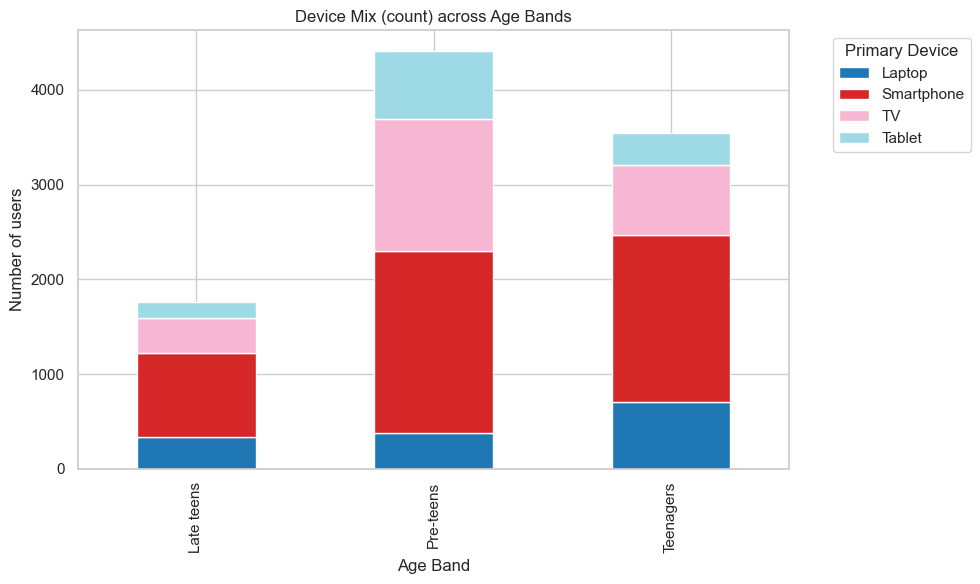

In [3]:
# ---------------------------------------------------------
# Plot 1: Stacked Bar — Device mix across Age_Band (counts)
# ---------------------------------------------------------
plt.figure(figsize=(10,6))
device_by_age = pd.crosstab(df['Age_Band'], df['Primary_Device'])
device_by_age.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10,6))
plt.title("Device Mix (count) across Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Number of users")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
OBSERVATIONS:
1) Smartphones form the largest share in nearly every age band and dominate usage, especially among teenagers.
2) Pre-teens show relatively higher tablet share compared with older cohorts, indicating parental provision of tablets.
3) Laptop presence is low among younger cohorts and slightly higher among older teens/adults in the data.
4) Overall trend: device usage shifts toward more portable devices as age decreases.

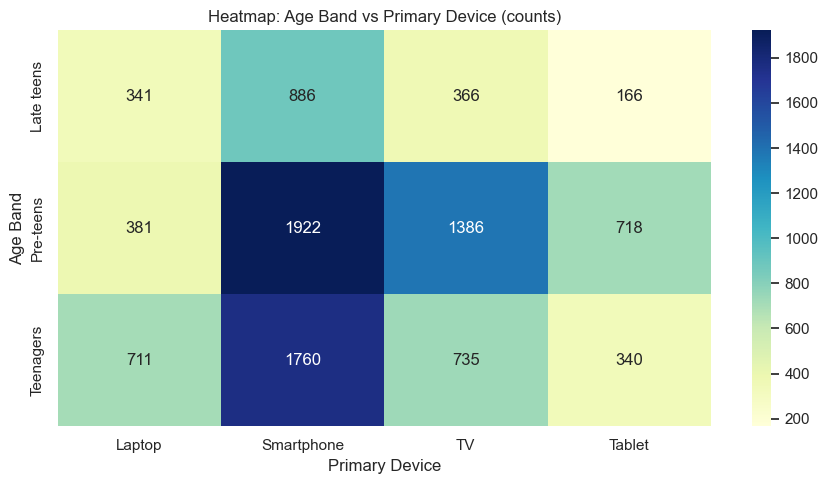

In [4]:
# ---------------------------------------------------------
# Plot 2: Heatmap — Age_Band vs Primary_Device (counts)
# ---------------------------------------------------------
plt.figure(figsize=(9,5))
heat = pd.crosstab(df['Age_Band'], df['Primary_Device'])
sns.heatmap(heat, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Age Band vs Primary Device (counts)")
plt.xlabel("Primary Device")
plt.ylabel("Age Band")
plt.tight_layout()
plt.show()


In [ ]:
OBSERVATIONS:
1) The heatmap highlights the highest counts for Teenagers using Smartphones (strong concentration).
2) Pre-teens show notable counts in Tablets; Desktop counts are relatively low overall.
3) Heat intensity confirms that smartphone adoption rises with age within the youth cohorts.

<Figure size 1000x600 with 0 Axes>

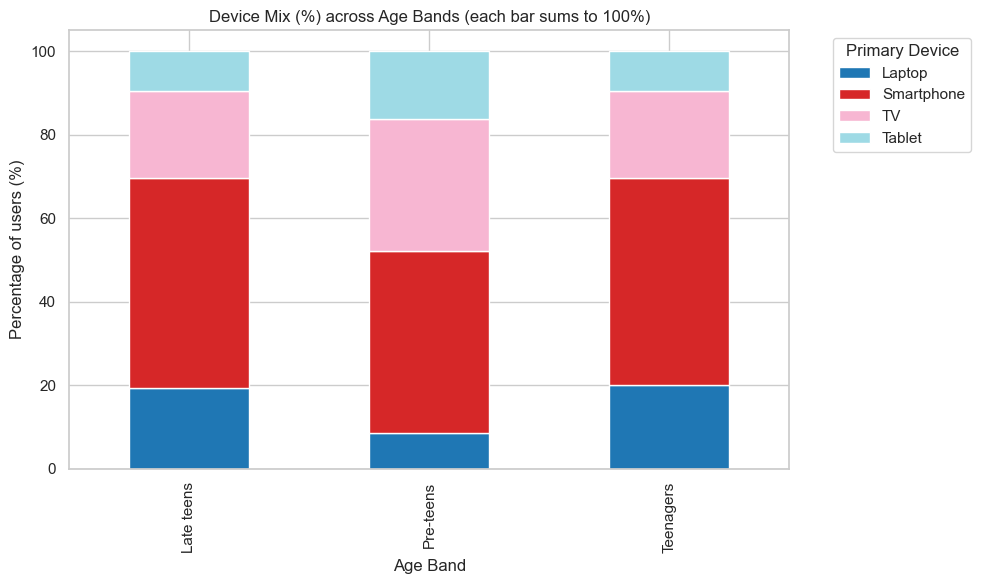

In [5]:
# ---------------------------------------------------------
# Plot 3: Cohort % Stacked Bar — Device share (%) per Age_Band
# ---------------------------------------------------------
pct = device_by_age.div(device_by_age.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10,6))
pct.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10,6))
plt.title("Device Mix (%) across Age Bands (each bar sums to 100%)")
plt.xlabel("Age Band")
plt.ylabel("Percentage of users (%)")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
OBSERVATIONS:
1) Percentage view shows smartphones often account for >50% in Teenagers, indicating dominance.
2) Pre-teen bars are more distributed — tablets and phones share the split more evenly.
3) This normalized view helps compare device preference proportions across cohorts of different sizes.
4) Useful for product decisions: targeting device-specific features by age cohort.

<Figure size 1100x600 with 0 Axes>

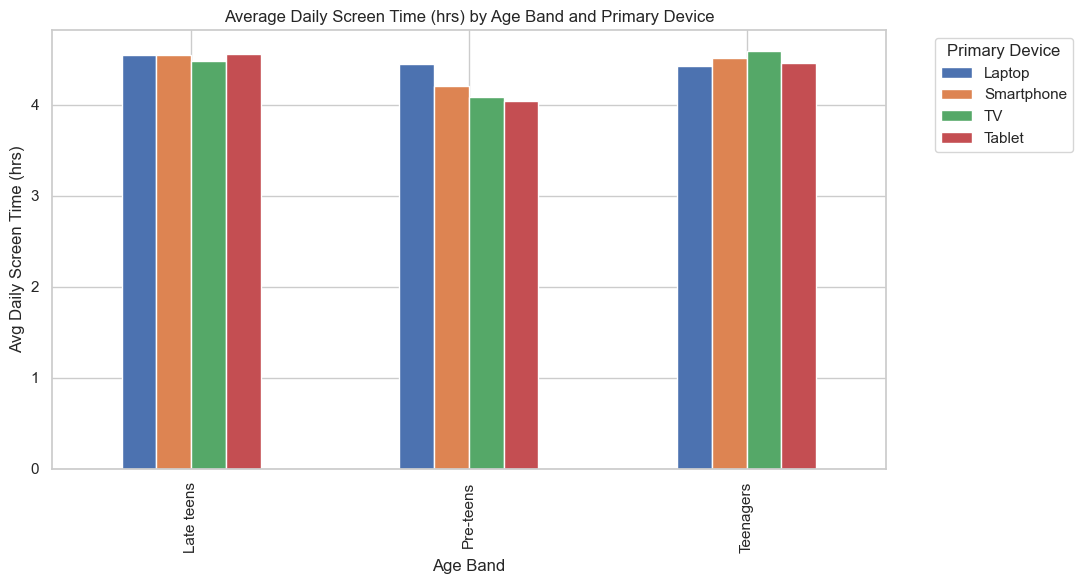

In [7]:
# ---------------------------------------------------------
# Plot 4: Grouped Bar — Average Screen Time by Age_Band & Primary_Device
# ---------------------------------------------------------
plt.figure(figsize=(11,6))
avg_time = df.groupby(['Age_Band','Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
avg_time.plot(kind='bar', figsize=(11,6))
plt.title("Average Daily Screen Time (hrs) by Age Band and Primary Device")
plt.xlabel("Age Band")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.legend(title='Primary Device', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
OBSERVATIONS:
1) Teenagers using smartphones or tablets often show the highest average screen hours.
2) Desktop users (where present) may show moderate usage, often linked to educational or work tasks.
3) Differences across devices indicate that portable devices are associated with longer daily usage.
4) This helps identify which device cohorts are at higher risk of excessive screen time.

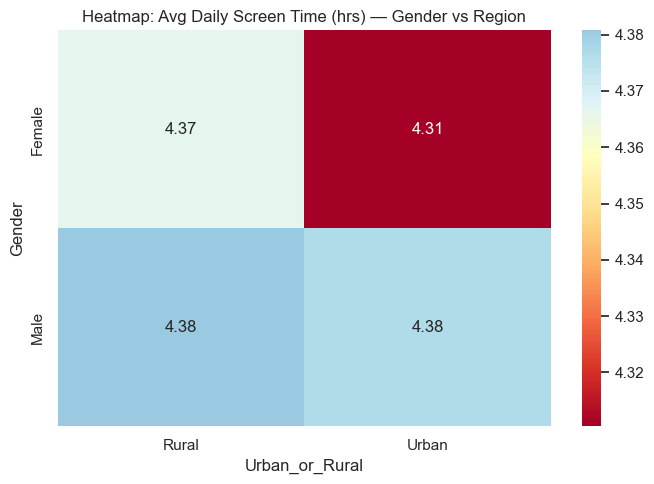

In [8]:
# ---------------------------------------------------------
# Plot 5: Heatmap — Avg Screen Time by Gender and Urban_or_Rural
# ---------------------------------------------------------
plt.figure(figsize=(7,5))
pivot = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Gender', columns='Urban_or_Rural', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='RdYlBu', center=pivot.values.mean())
plt.title("Heatmap: Avg Daily Screen Time (hrs) — Gender vs Region")
plt.tight_layout()
plt.show()

In [ ]:
OBSERVATIONS:
1) Urban users (especially urban males) show higher average screen time compared to rural users.
2) Heatmap provides quick cross-segment comparison for policy or targeting decisions.
3) The color gradient makes it easy to spot which demographic segments have higher exposure.
4) Use this to prioritize cohorts for interventions or awareness campaigns.

<Figure size 900x600 with 0 Axes>

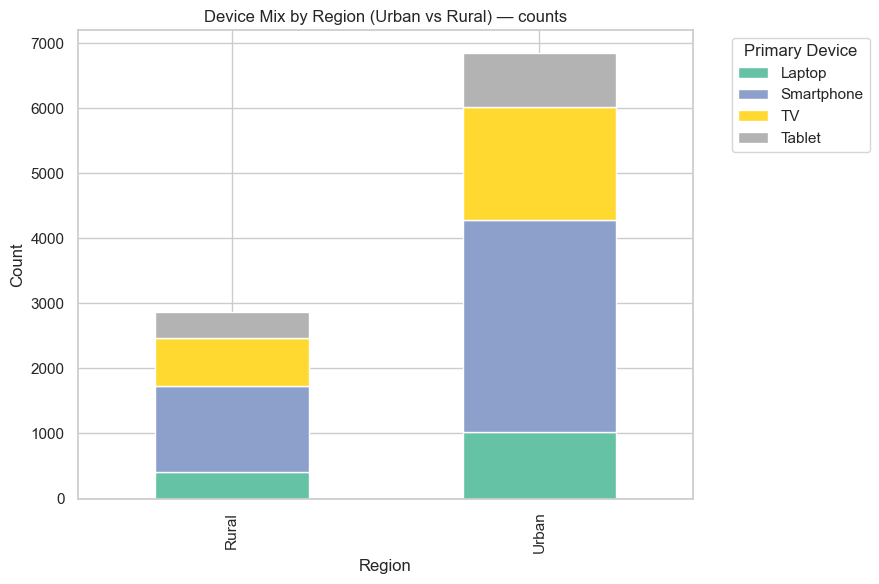

In [9]:
# ---------------------------------------------------------
# Plot 6: Stacked Bar — Primary_Device by Urban_or_Rural (counts)
# ---------------------------------------------------------
plt.figure(figsize=(9,6))
device_region = pd.crosstab(df['Urban_or_Rural'], df['Primary_Device'])
device_region.plot(kind='bar', stacked=True, colormap='Set2', figsize=(9,6))
plt.title("Device Mix by Region (Urban vs Rural) — counts")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title='Primary Device', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
OBSERVATIONS:
1) Urban regions have a larger absolute number of smartphone users; rural areas show some tablet/other device share.
2) The stacked counts reveal overall penetration differences between regions.
3) A region-level view is essential for designing localized digital literacy or health programs.
4) This plot shows where device-specific interventions (e.g., mobile-first campaigns) should be prioritized.

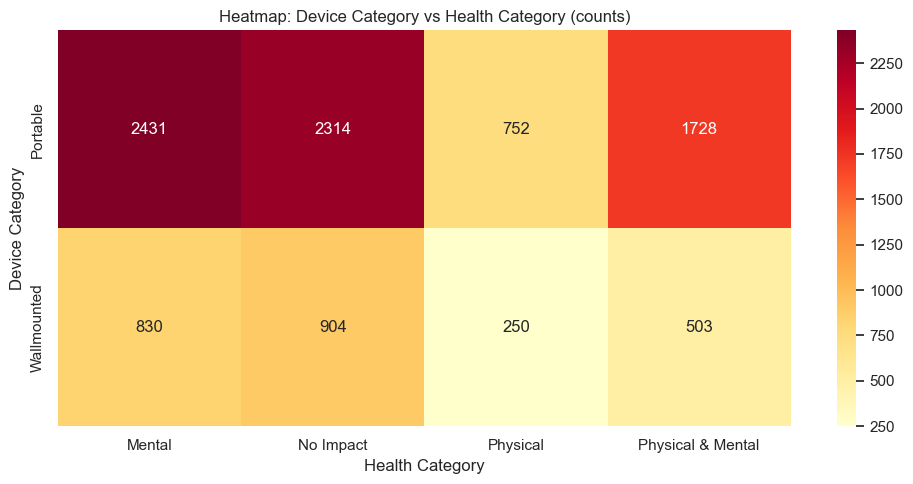

In [10]:
# ---------------------------------------------------------
# Plot 7: Heatmap — Device_Category vs Health_Category (counts)
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
hc = pd.crosstab(df['Device_Category'], df['Health_Category'])
sns.heatmap(hc, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Heatmap: Device Category vs Health Category (counts)")
plt.xlabel("Health Category")
plt.ylabel("Device Category")
plt.tight_layout()
plt.show()

In [ ]:
OBSERVATIONS:
1) Physical health-related categories (eye strain, obesity risk) show larger counts for portable device categories.
2) Some device categories correlate with specific health impact proportions, suggesting usage patterns drive outcomes.
3) This cohort-level heatmap helps identify which device groups have higher reported health issues.
4) Findings support targeted ergonomic guidance for those device categories.